In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nettools.monoplex import NetworkGenerator 
from nettools.multiplex import MultiplexConstructor
from nettools.multiplex import InterMeasures

# Generating synthetic networks
In this experiment I generate few synthetic networks, in purpose to examinate their properties
and find best candidates for future experiment. To realize this aim I implement few methods and classes, which are able to construct Multiplex networks.

#### Generate signle layer networks

In [2]:
ng = NetworkGenerator(300)
network_ba_1 = ng.ba_network(m0=10)
network_ba_2 = ng.ba_network(m0=10)
network_er_1 = ng.er_network(p=0.2)
network_er_2 = ng.er_network(p=0.2)

#### Generate correlated networks for Barabassi Albert networks
To build correlated multilayer network, first we must create layers, which are correlated with other layer.
It can be done by rewiring some edges. Degree distribution is preserved but two network will be different, It's mean high degree correlation but low conditional probability between edges on each layer, given other layer.

In [3]:
mc = MultiplexConstructor()

In [4]:
network_corr_ba_1 = mc.rewire_hubs(network_ba_1, rsteps=5000)
network_corr_ba_2 = mc.rewire_hubs(network_ba_2, rsteps=150)

#### Construct Multiplex networks

In [5]:
multi_er_er = mc.construct(network_er_1, network_er_2)
multi_er_ba = mc.construct(network_er_2, network_ba_1)
multi_ba_ba_nc = mc.construct(network_ba_2, network_ba_1)
multi_ba_ba_corr_1 = mc.construct(network_ba_1, network_corr_ba_1)
multi_ba_ba_corr_2 = mc.construct(network_ba_2, network_corr_ba_2)

# Measure network properties
After network generation and construction, examine basic network properties

## Degree correlations
Degree correlation as conditional probability, that node i have degree k given degree d on other layer. <br>
Using this approach we can check degree correlation for our synthetic correlated multilayer network too.

#### ER - ER

In [6]:
n_layers = multi_er_er.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_er.network[:, :, layer_ref], 
            multi_er_er.network[:, :, layer_test]
        )

In [7]:
corr_matrix

array([[ 1.        ,  0.05333333],
       [ 0.05333333,  1.        ]])

#### ER - BA

In [8]:
n_layers = multi_er_ba.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_ba.network[:, :, layer_ref], 
            multi_er_ba.network[:, :, layer_test]
        )

In [9]:
corr_matrix

array([[ 1.        ,  0.00333333],
       [ 0.00333333,  1.        ]])

#### BA - BA

In [10]:
n_layers = multi_ba_ba_nc.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_nc.network[:, :, layer_ref], 
            multi_ba_ba_nc.network[:, :, layer_test]
        )

In [11]:
corr_matrix

array([[ 1.        ,  0.16333333],
       [ 0.16333333,  1.        ]])

Lower *m* parameter leads to higher correlation between nodes.

#### BA - BA [Correlation]

In [12]:
n_layers = multi_ba_ba_corr_1.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_corr_1.network[:, :, layer_ref], 
            multi_ba_ba_corr_1.network[:, :, layer_test]
        )

In [13]:
corr_matrix

array([[ 1.,  1.],
       [ 1.,  1.]])

As we can see from previous reaserch, for first three networks there is no correlation between layers.
Only last multilayer network is highly correlated as it was expected.

## Degree distribution
Degree distribution for each network.

#### ER - ER

In [14]:
deg_dist_erer = InterMeasures.degree_distribution(multi_er_er.network)
kcorr_erer = InterMeasures.kendal_corr(deg_dist_erer)

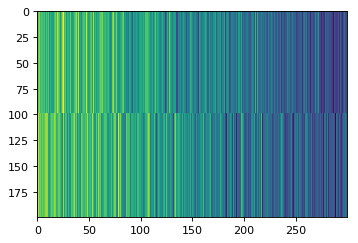

In [15]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erer, 100, axis=0))
plt.show()

By looking at degree distribution plot for two random network we can see that, both layers are not correlated and for each network degree is Poisson distributed, all nodes have degree not far from distribution mean value.
Using random network in experiment I want to check *Buldyrev* thesis about percolation threshold for interdependent networks *Catastrophic cascade of failures in interdependent networks*

#### ER - BA

In [16]:
deg_dist_erba = InterMeasures.degree_distribution(multi_er_ba.network)
kcorr_erba = InterMeasures.kendal_corr(deg_dist_erba)

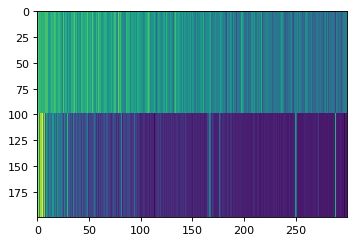

In [17]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erba, 100, axis=0))
plt.show()

Network constructed using **BA** network and **ER** network is also not correlated network. As expected random layer is Poisson distributed when BA layer is power-law network, few hubs and many small degree nodes.

#### BA - BA [No correlation]

In [18]:
deg_dist_baba = InterMeasures.degree_distribution(multi_ba_ba_nc.network)
kcorr_baba = InterMeasures.kendal_corr(deg_dist_baba)

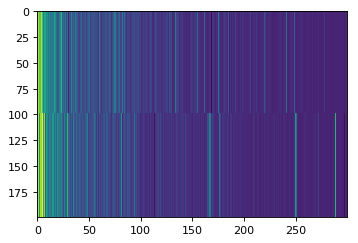

In [19]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba, 100, axis=0))
plt.show()

#### BA - BA [Correlated]

In [20]:
deg_dist_baba_corr = InterMeasures.degree_distribution(multi_ba_ba_corr_1.network)
kcorr_baba_corr = InterMeasures.kendal_corr(deg_dist_baba_corr)

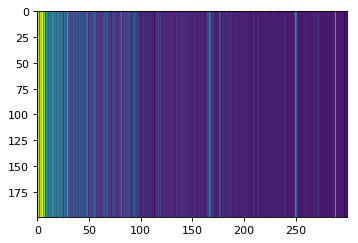

In [21]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba_corr, 100, axis=0))
plt.show()

Last degree distribution plot shows us that besides rewiring many nodes, *degree distribution* for rewired layer is **preserved**. That leads to the fact that our network have **same** *degree distribution* for each layer and two layers are **highly correlated**.

# Participation coefficient
Participation coefficient measure in how many layers node participate. Some nodes could have high degree in one layer and very small degree in other, participation coefficient helps us to measure how node degrees are distributed across all layers.

#### ER - ER

In [22]:
agg_net_erer = InterMeasures.aggregate(multi_er_er.network)

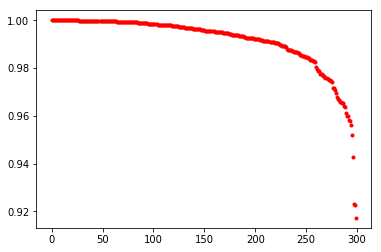

In [23]:
pc_erer = InterMeasures.participation_coeff(multi_er_er.network, agg_net_erer)
plt.figure()
plt.plot(np.sort(pc_erer)[::-1], '.r')
plt.show()

In Erdos Renyi networks all nodes have similiar degrees, so probably participation coefficient highly depends on network degree distribution mean ratio. In analyzed network one layer have higher mean value then other, that's why probably participation coefficient is not equal 1.0 but little lower, but as expected all nodes have similiar participation coefficient +- 0.7

#### ER - BA

In [24]:
agg_net_erba = InterMeasures.aggregate(multi_er_ba.network)

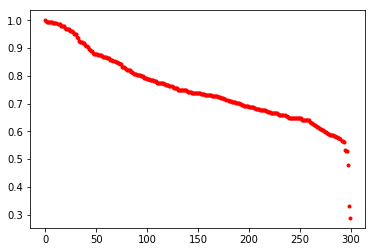

In [25]:
pc_erba = InterMeasures.participation_coeff(multi_er_ba.network, agg_net_erba)
plt.figure()
plt.plot(np.sort(pc_erba)[::-1], '.r')
plt.show()

Participation coefficient for mixed network **ER + BA** highly depends on random netork mean value.
* When value is high, nodes from random layer have comparable degree to hubs in BA network [small coefficient]
* When value is low, many nodes from random layer have comparable degree to low connected nodes from BA layer, in BA network there is a lot of low connected nodes, thats imply high values of praticipation coeff

#### BA - BA

In [26]:
agg_net_baba_nc = InterMeasures.aggregate(multi_ba_ba_nc.network)

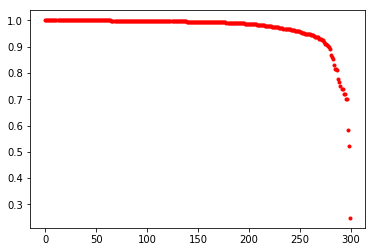

In [27]:
pc_baba_nc = InterMeasures.participation_coeff(multi_ba_ba_nc.network, agg_net_baba_nc)
plt.figure()
plt.plot(np.sort(pc_baba_nc)[::-1], '.r')
plt.show()

Participation coefficient value for two *Barabassi Albert* networks depends on parameter *m*, which characterize this type of network. When we divide *p* by 2 in random layer [**ER - ER** network] and we divide *m* by 2 for **BA** layer in [**BA - BA**] network, we will see that **BA-BA** Multilayer is more robust.

Same *m* for two **BA** layer results in better participation, than same *p* for two **ER** layers.

#### BA - BA [Correlated]

In [28]:
agg_net_baba_corr_1 = InterMeasures.aggregate(multi_ba_ba_corr_1.network)

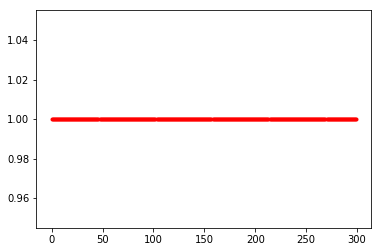

In [29]:
pc_baba_corr_1 = InterMeasures.participation_coeff(multi_ba_ba_corr_1.network, agg_net_baba_corr_1)
plt.figure()
plt.plot(np.sort(pc_baba_corr_1)[::-1], '.r')
plt.show()

## Participation Coefficient and Aggregated Degree 

In [30]:
degree_agg_erer = InterMeasures.degree_distribution(agg_net_erer)
z_score_erer = (degree_agg_erer - np.mean(degree_agg_erer)) / np.std(degree_agg_erer)

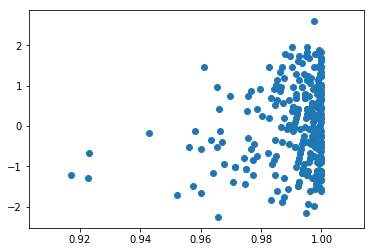

In [31]:
plt.figure()
plt.scatter(pc_erer, z_score_erer)
plt.show()

In [32]:
degree_agg_erba = InterMeasures.degree_distribution(agg_net_erba)
z_score_erba = (degree_agg_erba - np.mean(degree_agg_erba)) / np.std(degree_agg_erba)

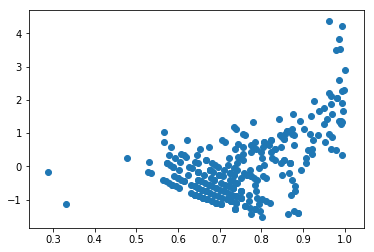

In [33]:
plt.figure()
plt.scatter(pc_erba, z_score_erba)
plt.show()

In [34]:
degree_agg_baba_nc = InterMeasures.degree_distribution(agg_net_baba_nc)
z_score_baba_nc = (degree_agg_baba_nc - np.mean(degree_agg_baba_nc)) / np.std(degree_agg_baba_nc)

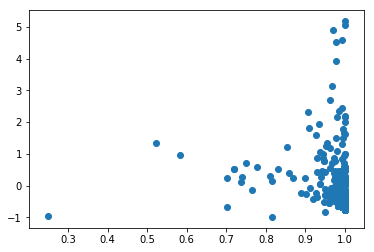

In [35]:
plt.figure()
plt.scatter(pc_baba_nc, z_score_baba_nc)
plt.show()

## Probability approach

In reaserch I decided to visualize probability approach of having node on test layer given test layer.
As expected there is not correlation between edges even for correlated **BA - BA** network

#### ER - ER

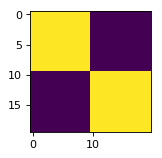

In [36]:
proba_erer = InterMeasures.link_layer_dependence(multi_er_er.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_erer = np.repeat(np.repeat(proba_erer, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_erer)
plt.show()


#### ER - BA

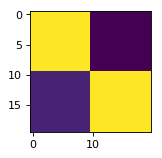

In [37]:
proba_erba = InterMeasures.link_layer_dependence(multi_er_ba.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_erba = np.repeat(np.repeat(proba_erba, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_erba)
plt.show()


#### BA-BA

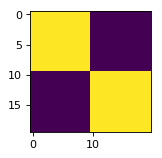

In [38]:
proba_baba_nc = InterMeasures.link_layer_dependence(multi_ba_ba_nc.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_baba_nc = np.repeat(np.repeat(proba_baba_nc, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_baba_nc)
plt.show()

#### BA-BA [Correlation]

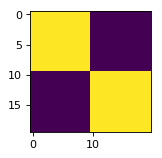

In [39]:
proba_baba_corr = InterMeasures.link_layer_dependence(multi_ba_ba_corr_1.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_baba_corr = np.repeat(np.repeat(proba_baba_corr, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_baba_corr)
plt.show()

## Probability approach with aggregated layer

Using probability approach with aggregated network we can obtain information about single layer importance.
In future this information can be use for example to create better representation of aggregated weighted network.

#### ER-ER

In [40]:
n_layers = multi_er_er.network.shape[-1]
layer_scores_erer = []
for layer_idx in range(n_layers):
    proba_layer_erer = InterMeasures.link_conditional(agg_net_erer, 
                                                      multi_er_er.network[:, :, layer_idx])
    layer_scores_erer.append(proba_layer_erer)
fin_scores_erer = np.sort(layer_scores_erer)
fin_arg_scores = np.argsort(layer_scores_erer)

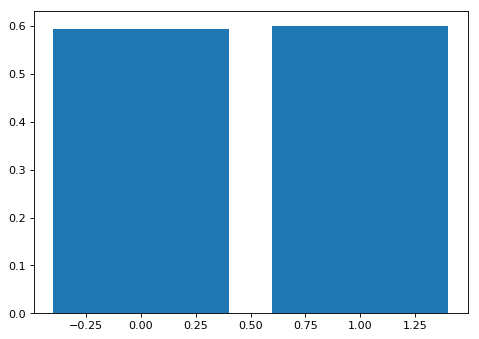

In [41]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erer)
plt.show()

#### ER-BA

In [42]:
n_layers = multi_er_ba.network.shape[-1]
layer_scores_erba = []
for layer_idx in range(n_layers):
    proba_layer_erba = InterMeasures.link_conditional(agg_net_erba, 
                                                      multi_er_ba.network[:, :, layer_idx])
    layer_scores_erba.append(proba_layer_erba)
fin_scores_erba = np.sort(layer_scores_erba)
fin_arg_scores = np.argsort(layer_scores_erba)

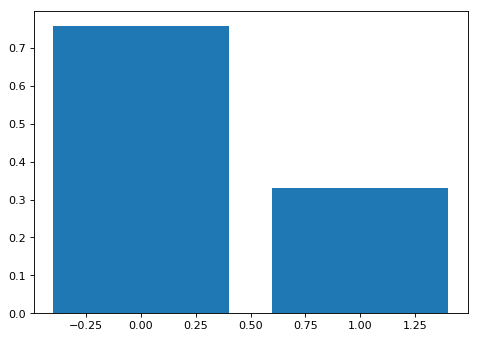

In [43]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erba)
plt.show()

#### BA-BA 

In [44]:
n_layers = multi_ba_ba_nc.network.shape[-1]
layer_scores_baba_nc = []
for layer_idx in range(n_layers):
    proba_layer_baba_nc = InterMeasures.link_conditional(agg_net_baba_nc, 
                                                      multi_ba_ba_nc.network[:, :, layer_idx])
    layer_scores_baba_nc.append(proba_layer_baba_nc)
fin_scores_baba_nc = np.sort(layer_scores_baba_nc)
fin_arg_scores = np.argsort(layer_scores_baba_nc)

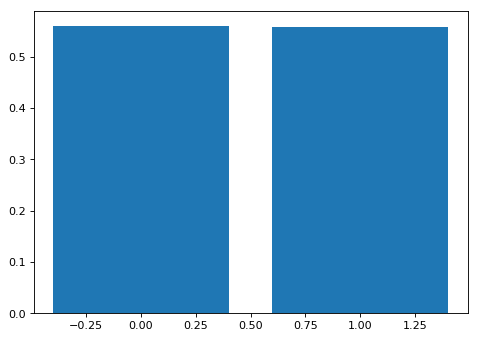

In [45]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_nc)
plt.show()

#### BA-BA Correlation

In [46]:
n_layers = multi_ba_ba_corr_1.network.shape[-1]
layer_scores_baba_corr_1 = []
for layer_idx in range(n_layers):
    proba_layer_baba_corr_1 = InterMeasures.link_conditional(agg_net_baba_corr_1, 
                                                      multi_ba_ba_corr_1.network[:, :, layer_idx])
    layer_scores_baba_corr_1.append(proba_layer_baba_corr_1)
fin_scores_baba_corr_1 = np.sort(layer_scores_baba_corr_1)
fin_arg_scores = np.argsort(layer_scores_baba_corr_1)

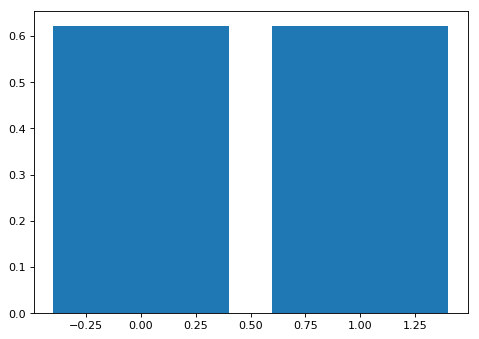

In [47]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_corr_1)
plt.show()

## Interdependence

#### ER - ER

In [48]:
inter_params_erer = InterMeasures.network_interdependence(multi_er_er.network)

In [49]:
"Network interdependence: {}".format(inter_params_erer[0])

'Network interdependence: 2.3359660761'

In [50]:
inter_erer = np.sort(inter_params_erer[1])
inter_arg_scores_erer = np.argsort(inter_params_erer[1])

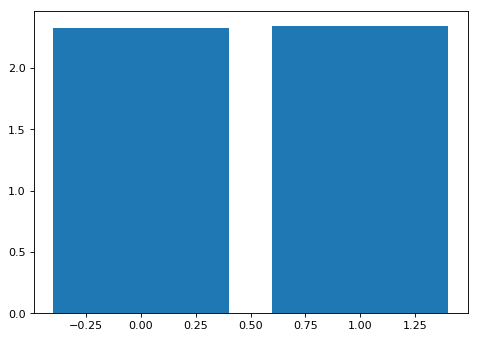

In [51]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_erer, inter_erer)
plt.show()

#### ER - BA

In [52]:
inter_params_erba = InterMeasures.network_interdependence(multi_er_ba.network)

In [53]:
"Network interdependence: {}".format(inter_params_erba[0])

'Network interdependence: 1.63141451835'

In [54]:
inter_erba = np.sort(inter_params_erba[1])
inter_arg_scores_erba = np.argsort(inter_params_erba[1])

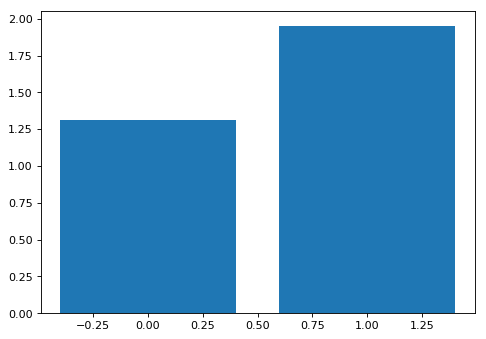

In [55]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_erba, inter_erba)
plt.show()

#### BA - BA [No Correlation]

In [56]:
inter_params_baba_nc = InterMeasures.network_interdependence(multi_ba_ba_nc.network)

In [57]:
"Network interdependence: {}".format(inter_params_baba_nc[0])

'Network interdependence: 3.12296661818'

In [58]:
inter_baba_nc = np.sort(inter_params_baba_nc[1])
inter_arg_scores_baba_nc = np.argsort(inter_params_baba_nc[1])

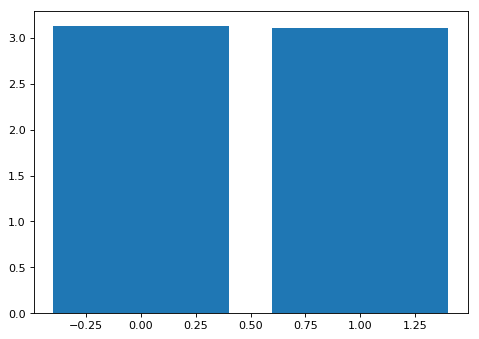

In [59]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_baba_nc, inter_baba_nc)
plt.show()

#### BA - BA [Correlation]

In [60]:
inter_params_baba_corr_1 = InterMeasures.network_interdependence(multi_ba_ba_corr_1.network)

In [61]:
"Network interdependence: {}".format(inter_params_baba_corr_1[0])

'Network interdependence: 2.08505037218'

In [62]:
inter_baba_corr_1 = np.sort(inter_params_baba_corr_1[1])
inter_arg_scores_baba_corr_1 = np.argsort(inter_params_baba_corr_1[1])

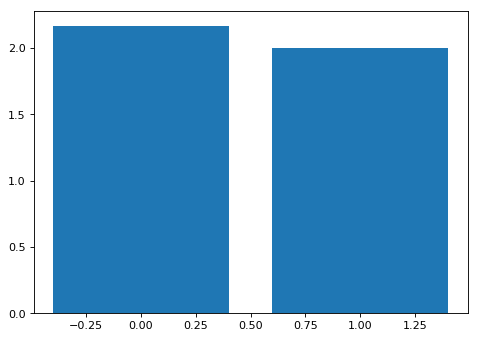

In [63]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_baba_corr_1, inter_baba_corr_1)
plt.show()